In [1]:
import pandas as pd
import os

In [2]:
def read_crop_data(csv_paths, crop):
    dfs = []
    for path in csv_paths:
        df = pd.read_csv(path)
        # Select columns
        df = df[["NAME", "DATE", "PRCP", "TAVG", "TMAX", "TMIN"]]

        # Extract State Abbreviation
        df["STATE"] = df["NAME"].str.extract(r",\s*([A-Z]{2})\s")[0]
        df = df.drop(columns=["NAME"])

        # Extract Year and Month
        df["YEAR"] = df["DATE"].str.split("-").str[0]
        df["MONTH"] = df["DATE"].str.split("-").str[1]
        df = df.drop(columns={"DATE"})

        # Map of numerical month value to month
        month_mapping = {
            "01": "January",
            "02": "February",
            "03": "March",
            "04": "April",
            "05": "May",
            "06": "June",
            "07": "July",
            "08": "August",
            "09": "September",
            "10": "October",
            "11": "November",
            "12": "December",
        }

        # Replace numerical month value with month
        df["MONTH"] = df["MONTH"].replace(month_mapping)

        # Create column for corresponding crop type
        df["CROP"] = crop

        dfs.append(df)

    #Combining dataframes of the same crop
    df_combined = pd.concat(dfs, ignore_index = True)

    return df_combined

In [3]:
# Relative paths for .csv data for each crop
corn_paths = ["Corn_1.csv", "Corn_2.csv"]
soybean_paths = ["Soybean_1.csv", "Soybean_2.csv"]
barley_paths = ["Barley_1.csv", "Barley_2.csv", "Barley_3.csv"]
oats_paths = ["Oats_1.csv", "Oats_2.csv"]

# Crop types
crops = ["corn", "soybean", "barley", "oats"]

#List of .csv paths
paths = [corn_paths, soybean_paths, barley_paths, oats_paths]

#Use for loop and read_crop_data() fo create crop dataframes
crop_data = {}
for path, crop in zip(paths, crops):
    crop_data[crop] = read_crop_data(path, crop)

for crop in crops:
    print(crop_data[crop].head())

for crop in crops:
    print(crop_data[crop][crop_data[crop].isnull().any(axis=1)])

for crop in crops:
    crop_data[crop].to_csv(os.path.join("cleaned_csvs", crop + ".csv"))

   PRCP  TAVG  TMAX  TMIN STATE  YEAR     MONTH  CROP
0  0.09  18.4  28.2   8.5    IA  2013   January  corn
1  0.07  21.4  30.6  12.2    IA  2013  February  corn
2  1.98  26.2  34.4  18.0    IA  2013     March  corn
3  6.16  41.3  51.2  31.3    IA  2013     April  corn
4  7.13  57.0  67.2  46.9    IA  2013       May  corn
   PRCP  TAVG  TMAX  TMIN STATE  YEAR      MONTH     CROP
0  2.42   NaN   NaN   NaN    NE  2020  September  soybean
1  0.75   NaN   NaN   NaN    NE  2020    October  soybean
2  1.27   NaN   NaN   NaN    NE  2020   November  soybean
3  8.20   NaN   NaN   NaN    NE  2021     August  soybean
4  0.40   NaN   NaN   NaN    NE  2021   November  soybean
   PRCP  TAVG  TMAX  TMIN STATE  YEAR     MONTH    CROP
0  1.04  16.5  26.9   6.1    ID  2013   January  barley
1  0.69  22.9  31.9  14.0    ID  2013  February  barley
2  1.54  32.1  42.5  21.7    ID  2013     March  barley
3  1.52  38.2  49.5  27.0    ID  2013     April  barley
4  1.25  49.9  63.2  36.6    ID  2013       May 

In [4]:
import urllib.request
import urllib.parse
import pandas as pd
from io import StringIO

class c_usda_quick_stats:
    
    def __init__(self):
        # Set the USDA QuickStats API key and base URL
        self.api_key = 'D48CBA42-D6F6-31A1-9EF1-46D1A70988F5'
        self.base_url_api_get = 'http://quickstats.nass.usda.gov/api/api_GET/?key=' + self.api_key + '&'
    
    def get_data(self, parameters):
        # Construct full URL and retrieve the data from the QuickStats server
        full_url = self.base_url_api_get + parameters
        full_url = urllib.parse.quote(full_url, safe=":/&?=")  # Ensure URL is well-formed
        
        try:
            # Make request to the QuickStats API
            s_result = urllib.request.urlopen(full_url)
            s_text = s_result.read().decode('utf-8')
            
            # Use pandas to read the CSV data into a DataFrame
            data = pd.read_csv(StringIO(s_text))
            
            return data  # Return DataFrame
            
        except urllib.error.HTTPError as e:
            print(f"HTTPError: {e.code} - {e.reason}")
        except urllib.error.URLError as e:
            print(f"URLError: {e.reason}")
        except Exception as e:
            print(f"An error occurred: {e}")
        return None


# Instantiate the API handler
stats = c_usda_quick_stats()

# Example parameters for each crop and year range
parameters = 'source_desc=SURVEY' + \
            '&sector_desc=CROPS' + \
            '&commodity_desc=CORN' + \
            '&statisticcat_desc=YIELD' + \
            '&short_desc=CORN, GRAIN - YIELD, MEASURED IN BU / ACRE' + \
            '&year__GE=2022' + \
            '&year__LE=2024' + \
            '&format=CSV'
    
# Fetch the data
df = stats.get_data(parameters)

df.head() 


,source_desc,sector_desc,group_desc,commodity_desc,class_desc,prodn_practice_desc,util_practice_desc,statisticcat_desc,unit_desc,short_desc,...,location_desc,year,freq_desc,begin_code,end_code,reference_period_desc,week_ending,load_time,Value,CV (%)
0,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",...,"ALABAMA, NORTHERN VALLEY, COLBERT",2023,ANNUAL,0,0,YEAR,NaN,2024-02-23 15:00:00.000,172.0,3.1
1,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",...,"ALABAMA, NORTHERN VALLEY, COLBERT",2022,ANNUAL,0,0,YEAR,NaN,2024-02-23 15:00:00.000,94.0,4.5
2,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",...,"ALABAMA, NORTHERN VALLEY, FRANKLIN",2023,ANNUAL,0,0,YEAR,NaN,2024-02-23 15:00:00.000,161.3,7.8
3,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",...,"ALABAMA, NORTHERN VALLEY, LAUDERDALE",2023,ANNUAL,0,0,YEAR,NaN,2024-02-23 15:00:00.000,155.6,2.8
4,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",...,"ALABAMA, NORTHERN VALLEY, LAUDERDALE",2022,ANNUAL,0,0,YEAR,NaN,2024-02-23 15:00:00.000,83.0,3.7


In [5]:
import pandas as pd
import urllib.request
import urllib.parse
from io import StringIO

# Define the USDA API handler class (as you provided)
class c_usda_quick_stats:
    
    def __init__(self):
        self.api_key = 'D48CBA42-D6F6-31A1-9EF1-46D1A70988F5'
        self.base_url_api_get = 'http://quickstats.nass.usda.gov/api/api_GET/?key=' + self.api_key + '&'
    
    def get_data(self, parameters):
        full_url = self.base_url_api_get + parameters
        full_url = urllib.parse.quote(full_url, safe=":/&?=")
        
        try:
            s_result = urllib.request.urlopen(full_url)
            s_text = s_result.read().decode('utf-8')
            data = pd.read_csv(StringIO(s_text))
            return data
        except urllib.error.HTTPError as e:
            print(f"HTTPError: {e.code} - {e.reason}")
        except urllib.error.URLError as e:
            print(f"URLError: {e.reason}")
        except Exception as e:
            print(f"An error occurred: {e}")
        return None

# Instantiate the USDA API handler
stats = c_usda_quick_stats()

# Define the crops and their USDA parameters for yield
crop_usda_params = {
    'corn': 'source_desc=SURVEY&sector_desc=CROPS&commodity_desc=CORN&statisticcat_desc=YIELD&short_desc=CORN, GRAIN - YIELD, MEASURED IN BU / ACRE&year__GE=2022&year__LE=2024&format=CSV',
    'soybean': 'source_desc=SURVEY&sector_desc=CROPS&commodity_desc=SOYBEANS&statisticcat_desc=YIELD&short_desc=SOYBEANS - YIELD, MEASURED IN BU / ACRE&year__GE=2022&year__LE=2024&format=CSV',
    'barley': 'source_desc=SURVEY&sector_desc=CROPS&commodity_desc=BARLEY&statisticcat_desc=YIELD&short_desc=BARLEY - YIELD, MEASURED IN BU / ACRE&year__GE=2022&year__LE=2024&format=CSV',
    'oats': 'source_desc=SURVEY&sector_desc=CROPS&commodity_desc=OATS&statisticcat_desc=YIELD&short_desc=OATS - YIELD, MEASURED IN BU / ACRE&year__GE=2022&year__LE=2024&format=CSV'
}

# Create an empty dictionary to store results for each crop
crop_results = {}

# Loop over each crop
for crop in crops:
    # Get the crop weather data
    crop_df = crop_data[crop]
    
    # Fetch the USDA yield data for the crop
    parameters = crop_usda_params[crop]
    usda_df = stats.get_data(parameters)
    
    # Ensure STATE and YEAR columns match
    usda_df = usda_df.rename(columns={"state_alpha": "STATE", "year": "YEAR", "Value": "YIELD"})
    
    # Ensure YEAR is of type string to match the crop data
    usda_df['YEAR'] = usda_df['YEAR'].astype(str)
    
    # Merge the crop data with the USDA data on STATE and YEAR
    merged_df = pd.merge(crop_df, usda_df[['STATE', 'YEAR', 'YIELD']], on=['STATE', 'YEAR'])
    
    # Convert the YIELD column to numeric, first converting to string, removing commas
    merged_df['YIELD'] = pd.to_numeric(merged_df['YIELD'].astype(str).str.replace(',', ''), errors='coerce')
    
    # Drop rows with missing values in the relevant columns
    merged_df = merged_df.dropna(subset=['PRCP', 'TAVG', 'TMAX', 'TMIN', 'YIELD'])
    
    # Perform correlation analysis
    correlation_matrix = merged_df[['PRCP', 'TAVG', 'TMAX', 'TMIN', 'YIELD']].corr()
    
    # Store the correlation matrix for this crop
    crop_results[crop] = correlation_matrix

# Print correlation matrices for each crop
for crop in crops:
    print(f"Correlation Matrix for {crop.capitalize()}:")
    print(crop_results[crop])
    print("\n")


Correlation Matrix for Corn:
           PRCP      TAVG      TMAX      TMIN     YIELD
PRCP   1.000000  0.470802  0.420503  0.517335  0.136607
TAVG   0.470802  1.000000  0.992903  0.991783 -0.018472
TMAX   0.420503  0.992903  1.000000  0.969537 -0.056139
TMIN   0.517335  0.991783  0.969537  1.000000  0.022198
YIELD  0.136607 -0.018472 -0.056139  0.022198  1.000000


Correlation Matrix for Soybean:
           PRCP      TAVG      TMAX      TMIN     YIELD
PRCP   1.000000  0.365003  0.327071  0.401566  0.108619
TAVG   0.365003  1.000000  0.995094  0.994387  0.088765
TMAX   0.327071  0.995094  1.000000  0.979049  0.078908
TMIN   0.401566  0.994387  0.979049  1.000000  0.098334
YIELD  0.108619  0.088765  0.078908  0.098334  1.000000


Correlation Matrix for Barley:
           PRCP      TAVG      TMAX      TMIN     YIELD
PRCP   1.000000  0.137837  0.091152  0.192404  0.119409
TAVG   0.137837  1.000000  0.992250  0.988195 -0.075246
TMAX   0.091152  0.992250  1.000000  0.961508 -0.065604
TMIN   0

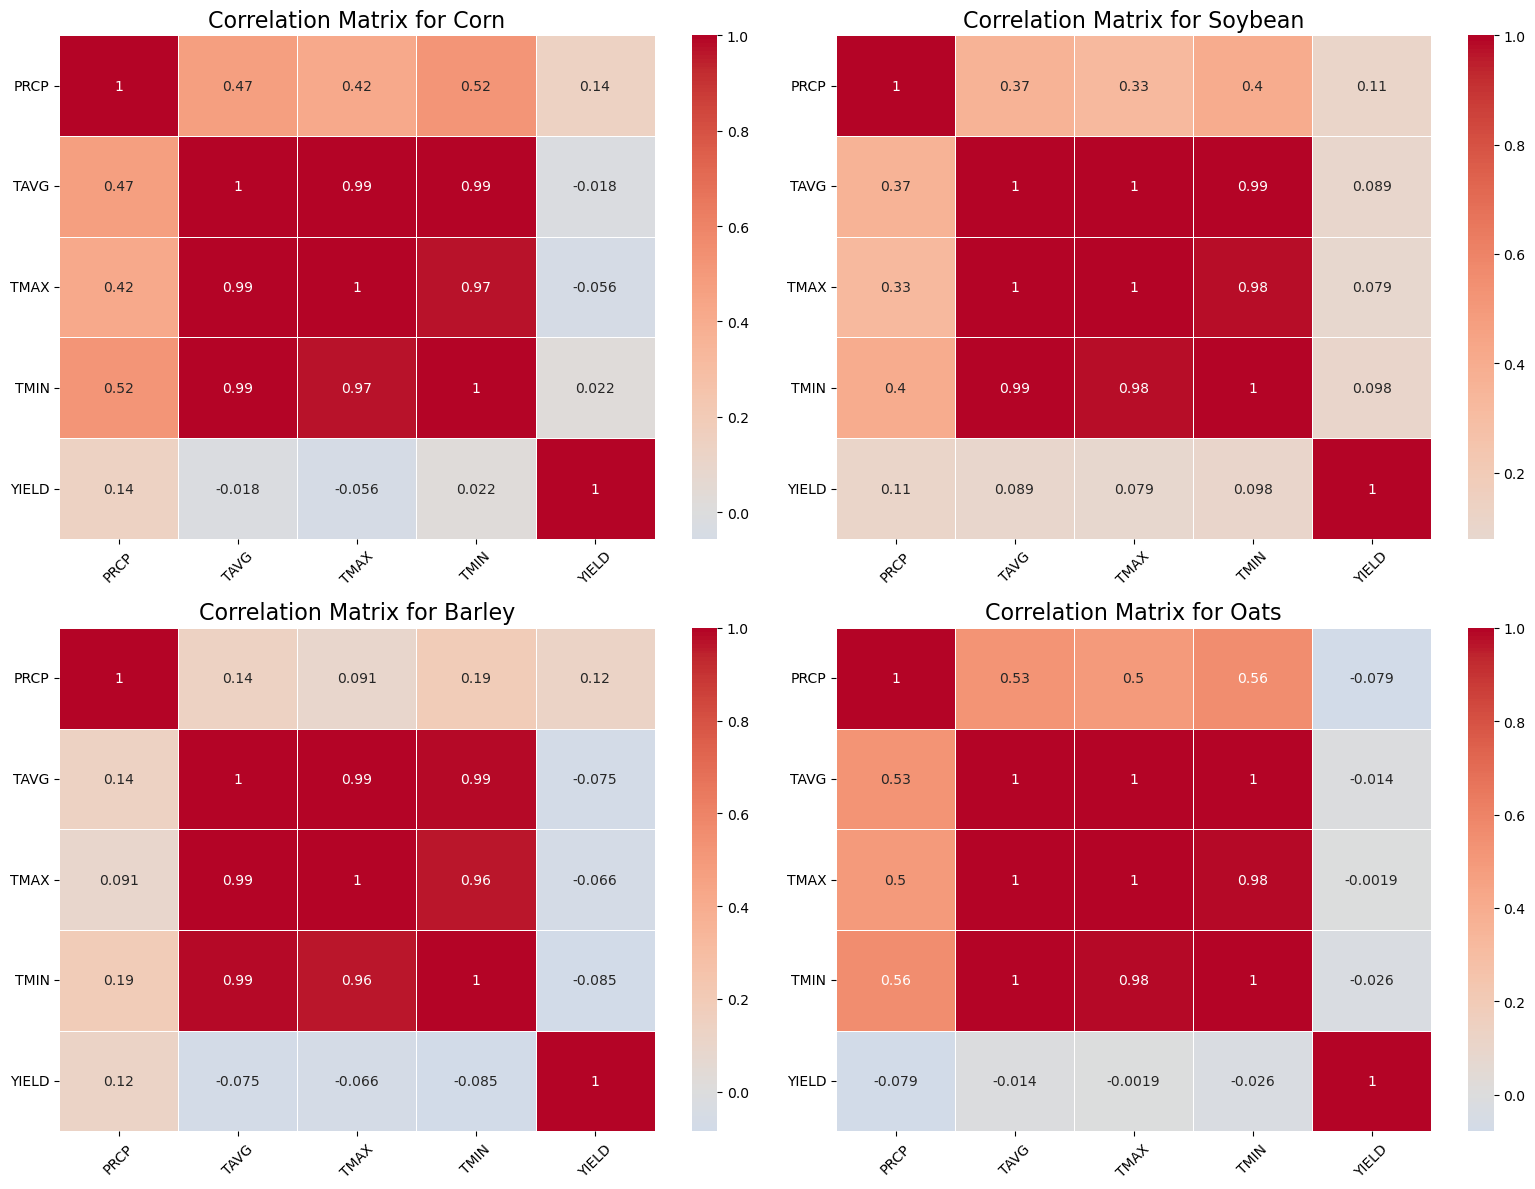

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of crops
crops = ['corn', 'soybean', 'barley', 'oats']

# Set up the figure with multiple subplots (2 rows and 2 columns for 4 crops)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each crop and plot the heatmap
for i, crop in enumerate(crops):
    # Get the correlation matrix for the current crop
    corr_matrix = crop_results[crop]

    # Create heatmap on the corresponding subplot axis
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Correlation Matrix for {crop.capitalize()}', fontsize=16)

    # Rotate tick labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the heatmaps
plt.show()


In [7]:
# Loop through each crop in crop_data
for crop in crops:
    print(f"Descriptive Statistics for {crop.capitalize()}:")

    # Get the combined DataFrame for each crop
    crop_df = crop_data[crop]
    
    # Select relevant columns for descriptive statistics
    relevant_columns = ['PRCP', 'TAVG', 'TMAX', 'TMIN']
    
    # Get descriptive statistics for weather data
    weather_desc = crop_df[relevant_columns].describe()
    print("Weather Data:")
    print(weather_desc)
    
    # If USDA data is merged, include 'YIELD' column
    usda_df = crop_results[crop]
    yield_desc = usda_df['YIELD'].describe()
    print("\nYield Data:")
    print(yield_desc)
    print("\n" + "="*50 + "\n")


Descriptive Statistics for Corn:
Weather Data:
              PRCP         TAVG         TMAX         TMIN
count  4553.000000  1392.000000  1397.000000  1394.000000
mean      2.715741    48.070690    59.615175    36.569082
std       2.298595    19.085918    19.767881    18.687068
min       0.000000     7.800000    16.400000    -5.400000
25%       0.930000    31.375000    41.400000    20.600000
50%       2.190000    48.300000    61.300000    35.850000
75%       3.870000    67.625000    79.200000    55.575000
max      15.860000    78.500000    92.500000    66.900000

Yield Data:
count    5.000000
mean     0.216839
std      0.443720
min     -0.056139
25%     -0.018472
50%      0.022198
75%      0.136607
max      1.000000
Name: YIELD, dtype: float64


Descriptive Statistics for Soybean:
Weather Data:
              PRCP         TAVG         TMAX         TMIN
count  3482.000000  1336.000000  1336.000000  1336.000000
mean      3.023093    49.993862    60.238249    39.747081
std       2.133712  

<Figure size 1000x600 with 0 Axes>

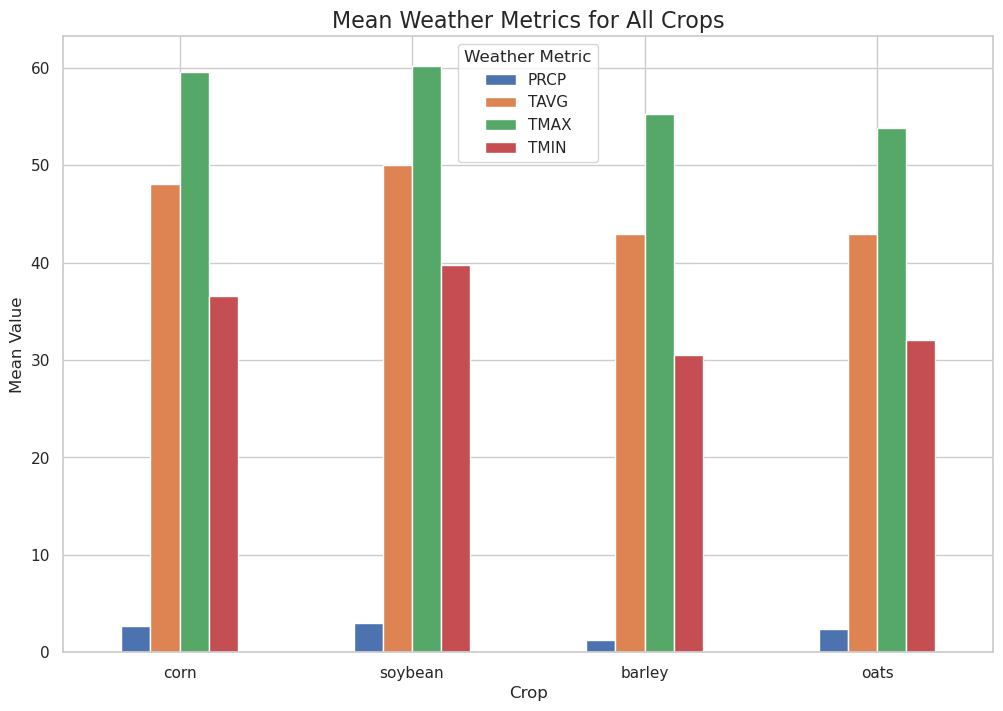

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of each weather metric for each crop
crop_means = {}
for crop in crop_data:
    crop_means[crop] = crop_data[crop][['PRCP', 'TAVG', 'TMAX', 'TMIN']].mean()

# Convert the dictionary to a DataFrame for easier plotting
crop_means_df = pd.DataFrame(crop_means).T

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart for each weather metric
plt.figure(figsize=(10, 6))
crop_means_df.plot(kind='bar', figsize=(12, 8))

# Set plot labels and title
plt.title("Mean Weather Metrics for All Crops", fontsize=16)
plt.xlabel("Crop", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.legend(title="Weather Metric")
plt.show()
